# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

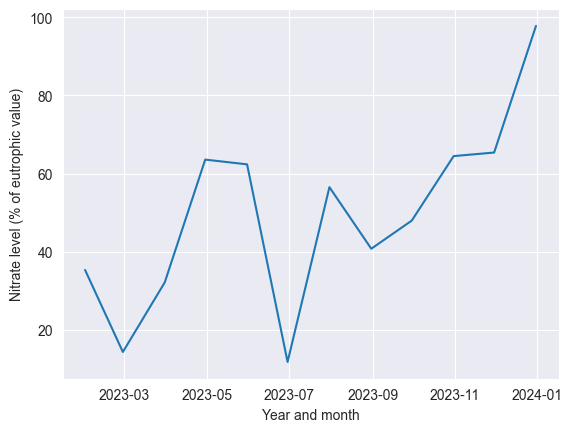

In [7]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

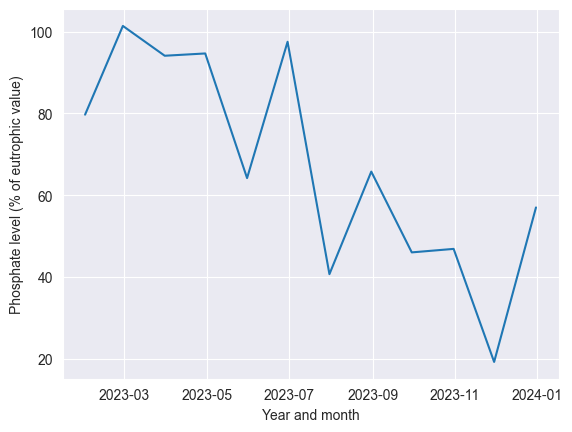

In [10]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

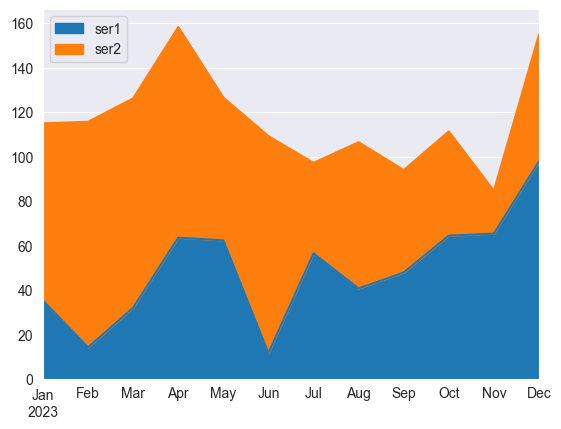

In [11]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets - Acute Kidney Injury Analysis

In this section, I will perform a comprehensive bivariate analysis of the acute kidney injury dataset, focusing on correlations, scatterplots, pairplots, and time-based visualizations.

## 3.1 Loading and Initial Exploration of the Dataset

In [23]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

aki_df = pd.read_csv('acute_kidney_injury.csv')

print("Dataset Shape:", aki_df.shape)
print("\n" + "="*50)
print("Column Names:")
print("="*50)
print(aki_df.columns.tolist())
print("\n" + "="*50)
print("Dataset Info:")
print("="*50)
aki_df.info()
print("\n" + "="*50)
print("Statistical Summary:")
print("="*50)
print(aki_df.describe())
print("\n" + "="*50)
print("First 5 rows of the dataset:")
print("="*50)
aki_df.head()

Dataset Shape: (4001, 57)

Column Names:
['gender', 'age', 'race', 'unit', 'bmi', 'weight', 't', 'p', 'r', 'bp', 'vent_firstday', 'vaso_firstday', 'chf', 'ckd', 'liver', 'pulmonary', 'hypertension', 'malignancy', 'stroke', 'cad', 'diabetes', 'hiv', 'anemia', 'drug_abuse', 'alcohol_abuse', 'sepsis', 'aki_stage', 'sofa', 'sapsii', 'mort_28_day', 'mort_90_day', 'mort_1_year', 'cox_los', 'sii', 'plr', 'nlr', 'mlr', 'glucose', 'wbc', 'rbc', 'ne', 'ly', 'mn', 'rdw', 'hb', 'plt', 'ck', 'ph', 'cl', 'na', 'k', 'bicarbonate', 'scr', 'bun', 'po2', 'pco2', 'lactate']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         4001 non-null   object 
 1   age            4001 non-null   int64  
 2   race           4001 non-null   object 
 3   unit           4001 non-null   object 
 4   bmi            3090 non-null   float64
 5   wei

gender  age   race  unit   bmi  weight     t      p     r    bp  ...    ph  \
0      M   76  white  MICU  30.2    96.8  37.0  112.0  17.0  76.0  ...  7.35   
1      M   91  other   CCU  24.1    65.7  36.2   81.0  21.0  72.0  ...   NaN   
2      M   68  other   CCU  26.1    78.0  36.0   56.0  22.0  77.0  ...  7.36   
3      F   36  other  MICU   NaN    70.0  37.4  112.0  17.0  79.0  ...  7.28   
4      F   71  other  CSRU  21.7    53.7  37.0   85.0  16.0  78.0  ...  7.46   

      cl   na    k  bicarbonate  scr  bun    po2  pco2  lactate  
0  114.0  138  4.4         13.0  2.4   41   20.0  40.0      4.3  
1   97.0  129  4.1         18.0  2.1   46    NaN   NaN      NaN  
2  107.0  138  3.6         24.0  0.7   19    NaN   NaN      2.0  
3  112.0  141  3.8         17.0  0.6   11  533.0  37.0      7.0  
4  110.0  138  6.9         22.0  0.6   16  388.0  27.0      NaN  

[5 rows x 57 columns]

In [24]:
print("Missing Values Count:")
print("="*50)
missing_df = pd.DataFrame({
    'Column': aki_df.columns,
    'Missing_Count': aki_df.isnull().sum(),
    'Missing_Percentage': (aki_df.isnull().sum() / len(aki_df) * 100).round(2)
})
print(missing_df[missing_df['Missing_Count'] > 0])

print("\n" + "="*50)
print("Data Types Summary:")
print("="*50)
print(aki_df.dtypes.value_counts())

categorical_cols = aki_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = aki_df.select_dtypes(include=[np.number]).columns.tolist()

print("\n" + "="*50)
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

Missing Values Count:
                  Column  Missing_Count  Missing_Percentage
bmi                  bmi            911               22.77
weight            weight            192                4.80
t                      t             98                2.45
p                      p              3                0.07
r                      r              7                0.17
bp                    bp              3                0.07
glucose          glucose              4                0.10
rbc                  rbc              5                0.12
rdw                  rdw              5                0.12
hb                    hb              3                0.07
ck                    ck           1735               43.36
ph                    ph            874               21.84
cl                    cl              3                0.07
bicarbonate  bicarbonate              6                0.15
po2                  po2            950               23.74
pco2              

## 3.2 Correlation Analysis

First, I'll identify numerical columns and calculate correlations between all pairs of variables. This will help identify relationships and potential redundancies in the data.

In [25]:
demographic_cols = ['gender', 'age', 'race', 'unit']
physical_cols = ['bmi', 'weight', 't', 'p', 'r', 'bp']
comorbidity_cols = ['chf', 'ckd', 'liver', 'pulmonary', 'hypertension', 'malignancy', 
                   'stroke', 'cad', 'diabetes', 'hiv', 'anemia', 'drug_abuse', 
                   'alcohol_abuse', 'sepsis']

clinical_cols = ['aki_stage', 'sofa', 'sapsii', 'vent_firstday', 'vaso_firstday']
outcome_cols = ['mort_28_day', 'mort_90_day', 'mort_1_year', 'cox_los']

blood_cols = ['sii', 'plr', 'nlr', 'mlr', 'glucose', 'wbc', 'rbc', 'ne', 'ly', 
              'mn', 'rdw', 'hb', 'plt', 'ck']

chemistry_cols = ['ph', 'cl', 'na', 'k', 'bicarbonate', 'scr', 'bun', 'po2', 'pco2', 'lactate']

print("Column Categories:")
print(f"Demographics: {len([c for c in demographic_cols if c in aki_df.columns])}")
print(f"Physical Measurements: {len([c for c in physical_cols if c in aki_df.columns])}")
print(f"Comorbidities: {len([c for c in comorbidity_cols if c in aki_df.columns])}")
print(f"Clinical Scores: {len([c for c in clinical_cols if c in aki_df.columns])}")
print(f"Outcomes: {len([c for c in outcome_cols if c in aki_df.columns])}")
print(f"Blood/Lab Indicators: {len([c for c in blood_cols if c in aki_df.columns])}")
print(f"Chemistry/Metabolic: {len([c for c in chemistry_cols if c in aki_df.columns])}")

Column Categories:
Demographics: 4
Physical Measurements: 6
Comorbidities: 14
Clinical Scores: 5
Outcomes: 4
Blood/Lab Indicators: 14
Chemistry/Metabolic: 10


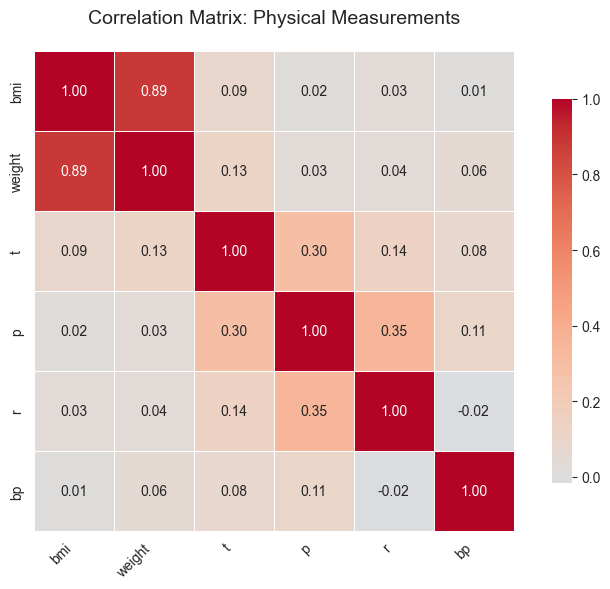

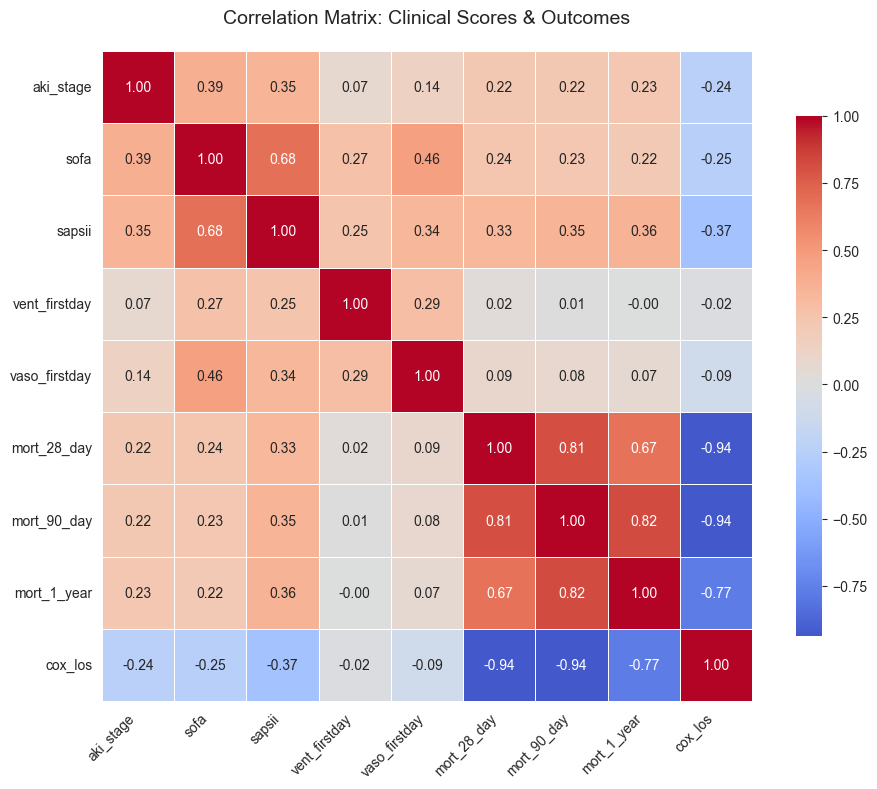

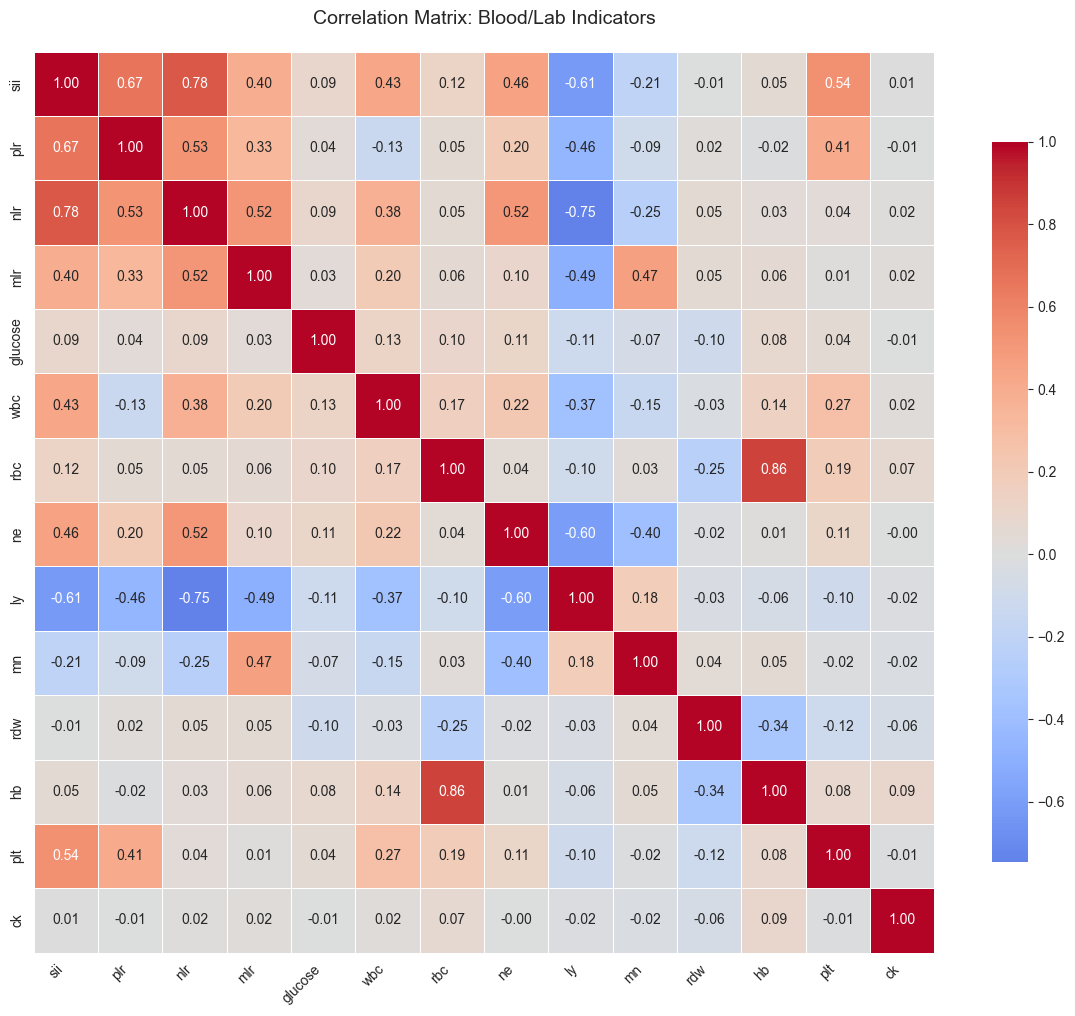

In [26]:
def plot_correlation_matrix(data, cols, title, figsize=(10, 8)):
    valid_cols = [col for col in cols if col in data.columns and col in numerical_cols]
    
    if len(valid_cols) < 2:
        print(f"Not enough numerical columns for {title}")
        return
    
    corr_subset = data[valid_cols].corr()
    
    plt.figure(figsize=figsize)
    sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8})
    plt.title(f'Correlation Matrix: {title}', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(aki_df, physical_cols, "Physical Measurements", (8, 6))
plot_correlation_matrix(aki_df, clinical_cols + outcome_cols, "Clinical Scores & Outcomes", (10, 8))
plot_correlation_matrix(aki_df, blood_cols, "Blood/Lab Indicators", (12, 10))

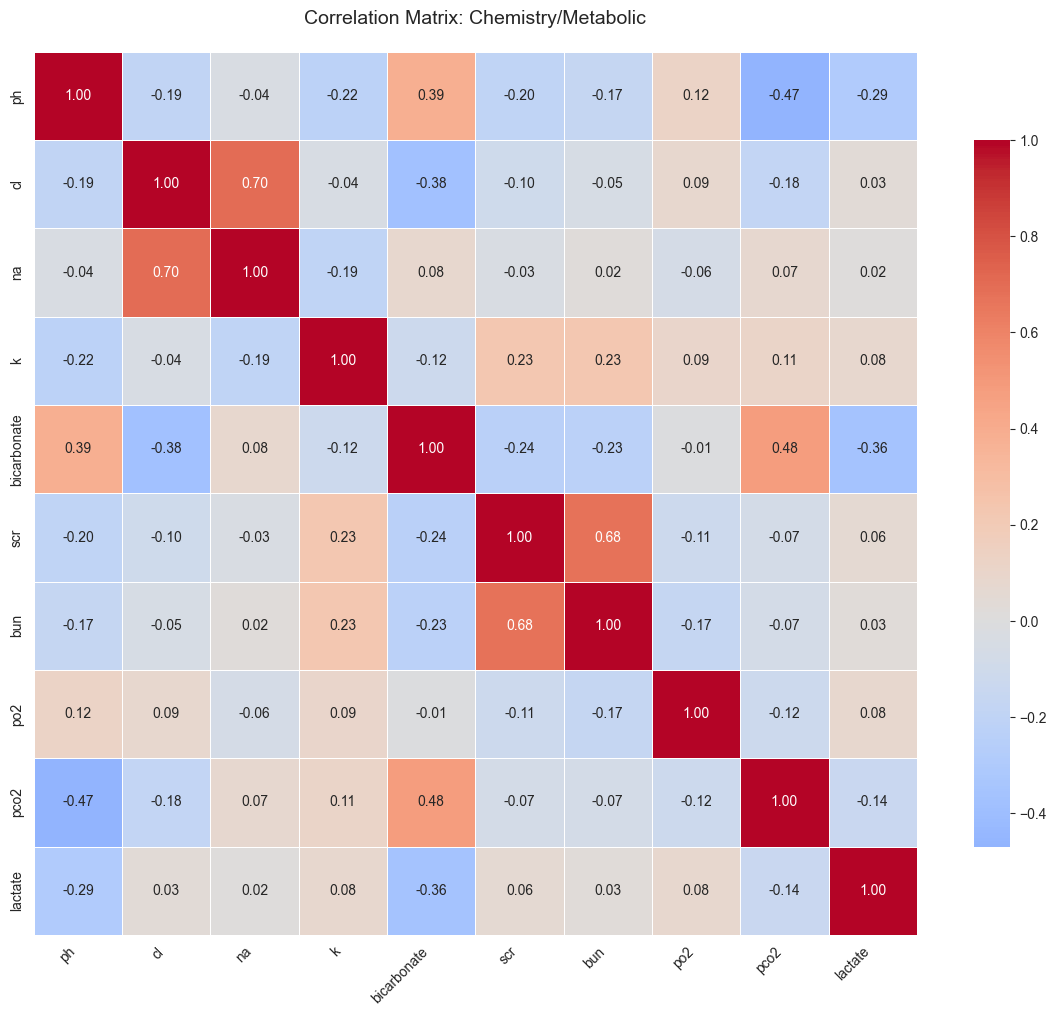

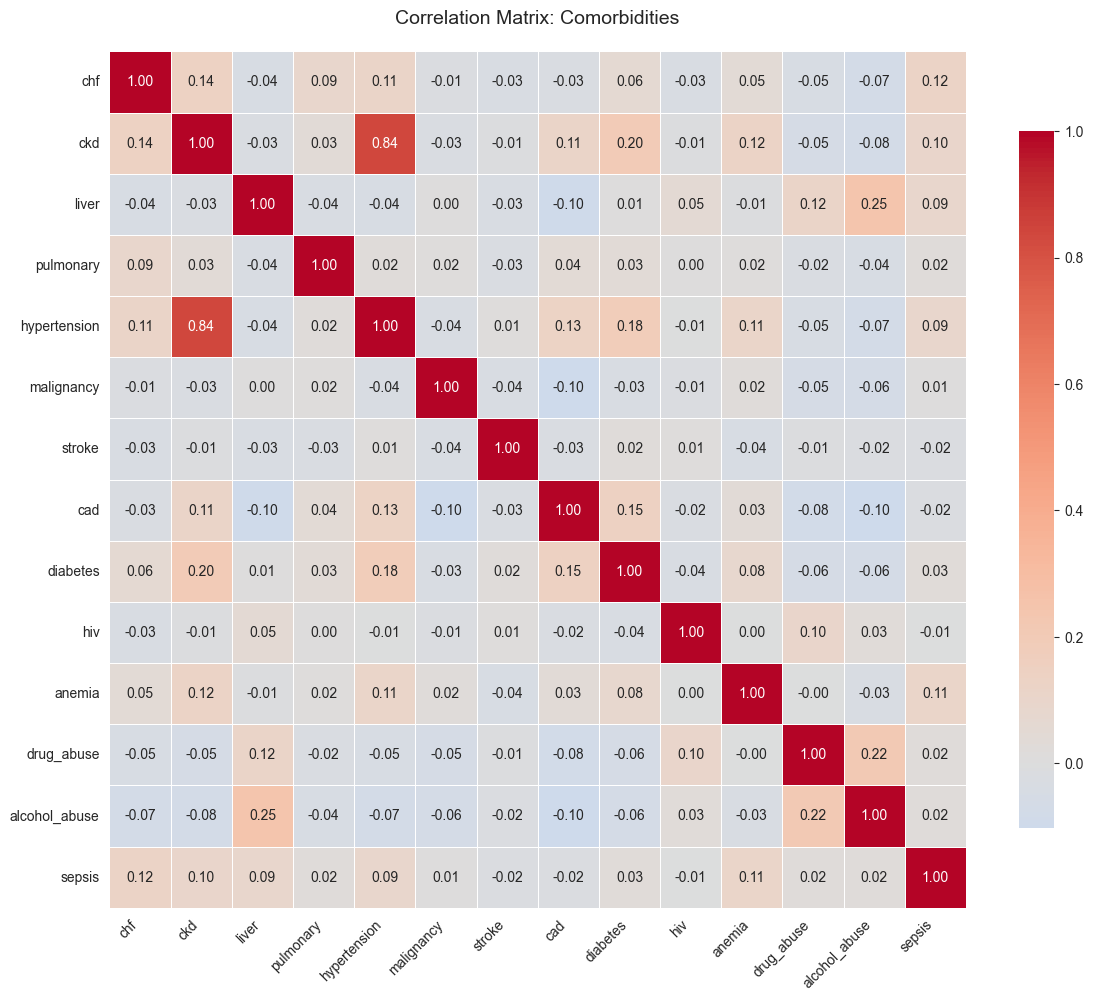

In [30]:
plot_correlation_matrix(aki_df, chemistry_cols, "Chemistry/Metabolic", (12, 10))
plot_correlation_matrix(aki_df, comorbidity_cols, "Comorbidities", (12, 10))

## 3.3 Scatterplots

I'll create focused scatterplots for different categories of variables to better visualize relationships.

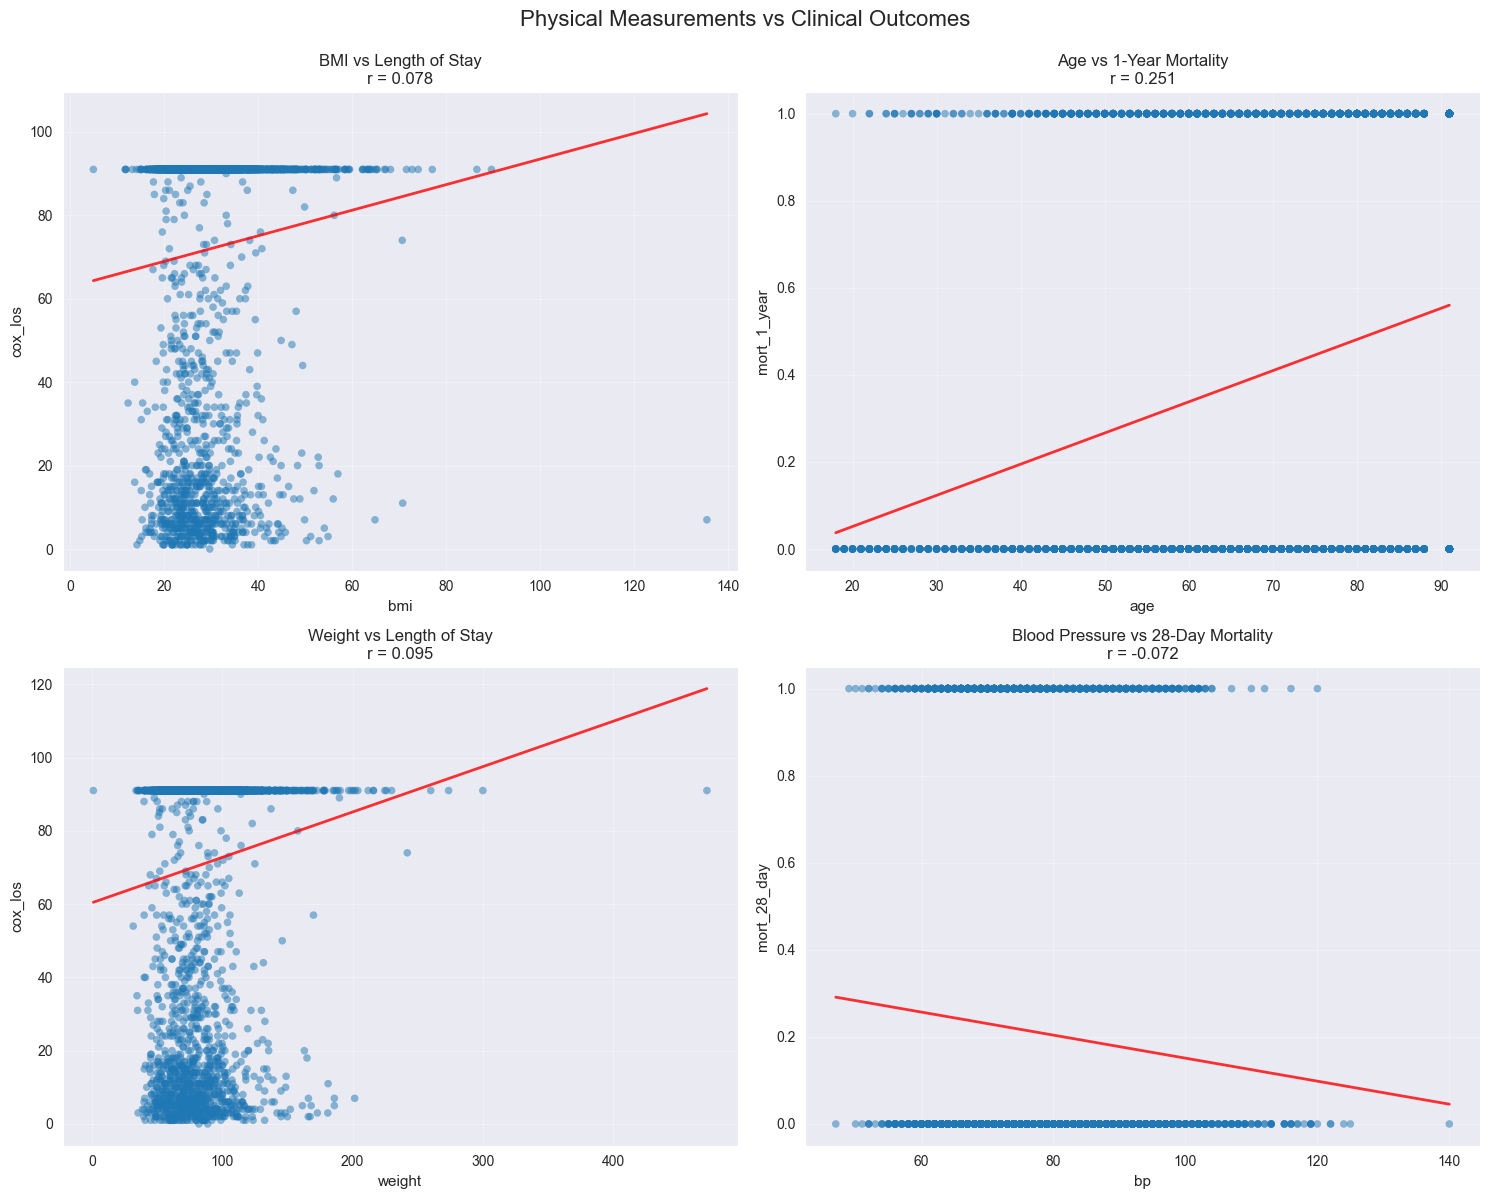

In [44]:
physical_vs_outcome_pairs = [
    ('bmi', 'cox_los', 'BMI vs Length of Stay'),
    ('age', 'mort_1_year', 'Age vs 1-Year Mortality'),
    ('weight', 'cox_los', 'Weight vs Length of Stay'),
    ('bp', 'mort_28_day', 'Blood Pressure vs 28-Day Mortality')
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, (var1, var2, title) in enumerate(physical_vs_outcome_pairs):
    ax = axes[idx]

    scatter = ax.scatter(aki_df[var1], aki_df[var2], alpha=0.5, s=30, edgecolors='none')

    mask = aki_df[[var1, var2]].notna().all(axis=1)
    if mask.sum() > 1:
        z = np.polyfit(aki_df.loc[mask, var1], aki_df.loc[mask, var2], 1)
        p = np.poly1d(z)
        x_line = np.linspace(aki_df[var1].min(), aki_df[var1].max(), 100)
        ax.plot(x_line, p(x_line), "r-", alpha=0.8, linewidth=2)

    corr = aki_df[var1].corr(aki_df[var2])
    
    ax.set_xlabel(var1, fontsize=11)
    ax.set_ylabel(var2, fontsize=11)
    ax.set_title(f'{title}\nr = {corr:.3f}', fontsize=12)
    ax.grid(True, alpha=0.3)

plt.suptitle('Physical Measurements vs Clinical Outcomes', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

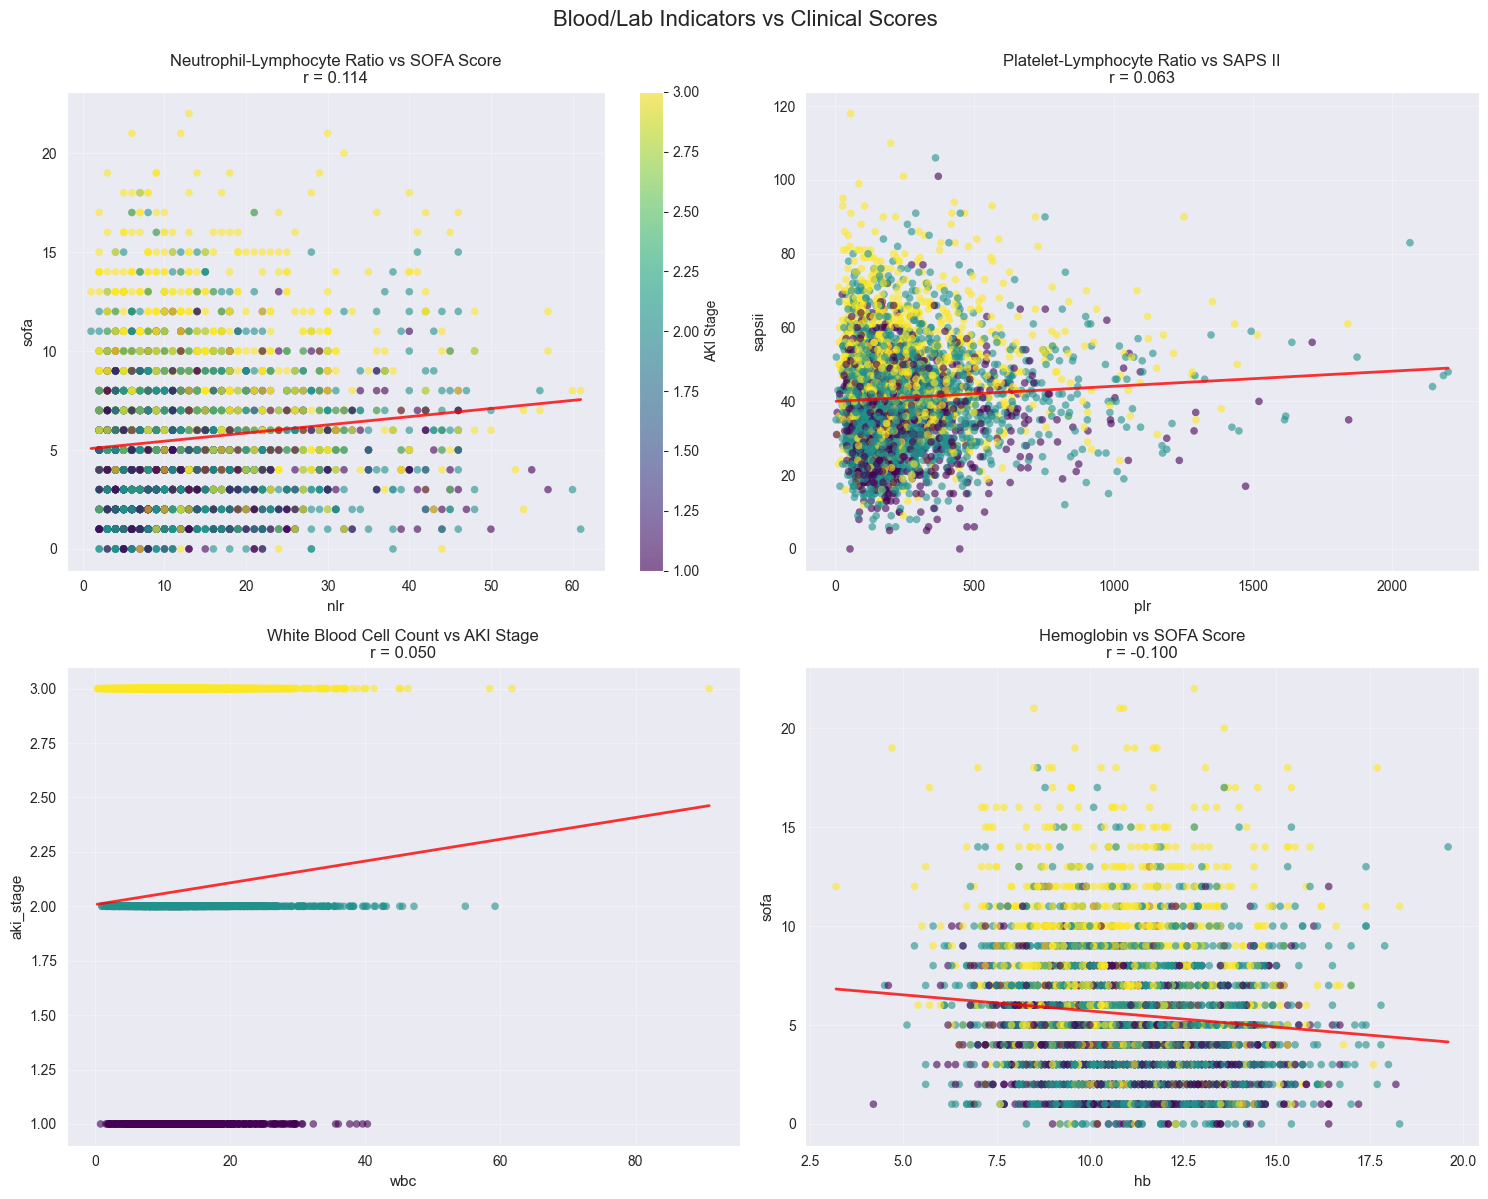

In [55]:
blood_vs_clinical_pairs = [
    ('nlr', 'sofa', 'Neutrophil-Lymphocyte Ratio vs SOFA Score'),
    ('plr', 'sapsii', 'Platelet-Lymphocyte Ratio vs SAPS II'),
    ('wbc', 'aki_stage', 'White Blood Cell Count vs AKI Stage'),
    ('hb', 'sofa', 'Hemoglobin vs SOFA Score')
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, (var1, var2, title) in enumerate(blood_vs_clinical_pairs):
    ax = axes[idx]

    scatter = ax.scatter(aki_df[var1], aki_df[var2],
                        c=aki_df['aki_stage'], cmap='viridis',
                        alpha=0.6, s=30, edgecolors='none')

    mask = aki_df[[var1, var2]].notna().all(axis=1)
    if mask.sum() > 1:
        z = np.polyfit(aki_df.loc[mask, var1], aki_df.loc[mask, var2], 1)
        p = np.poly1d(z)
        x_line = np.linspace(aki_df[var1].min(), aki_df[var1].max(), 100)
        ax.plot(x_line, p(x_line), "r-", alpha=0.8, linewidth=2)

    corr = aki_df[var1].corr(aki_df[var2])

    ax.set_xlabel(var1, fontsize=11)
    ax.set_ylabel(var2, fontsize=11)
    ax.set_title(f'{title}\nr = {corr:.3f}', fontsize=12)
    ax.grid(True, alpha=0.3)

    if idx == 0:
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('AKI Stage', fontsize=10)

plt.suptitle('Blood/Lab Indicators vs Clinical Scores', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

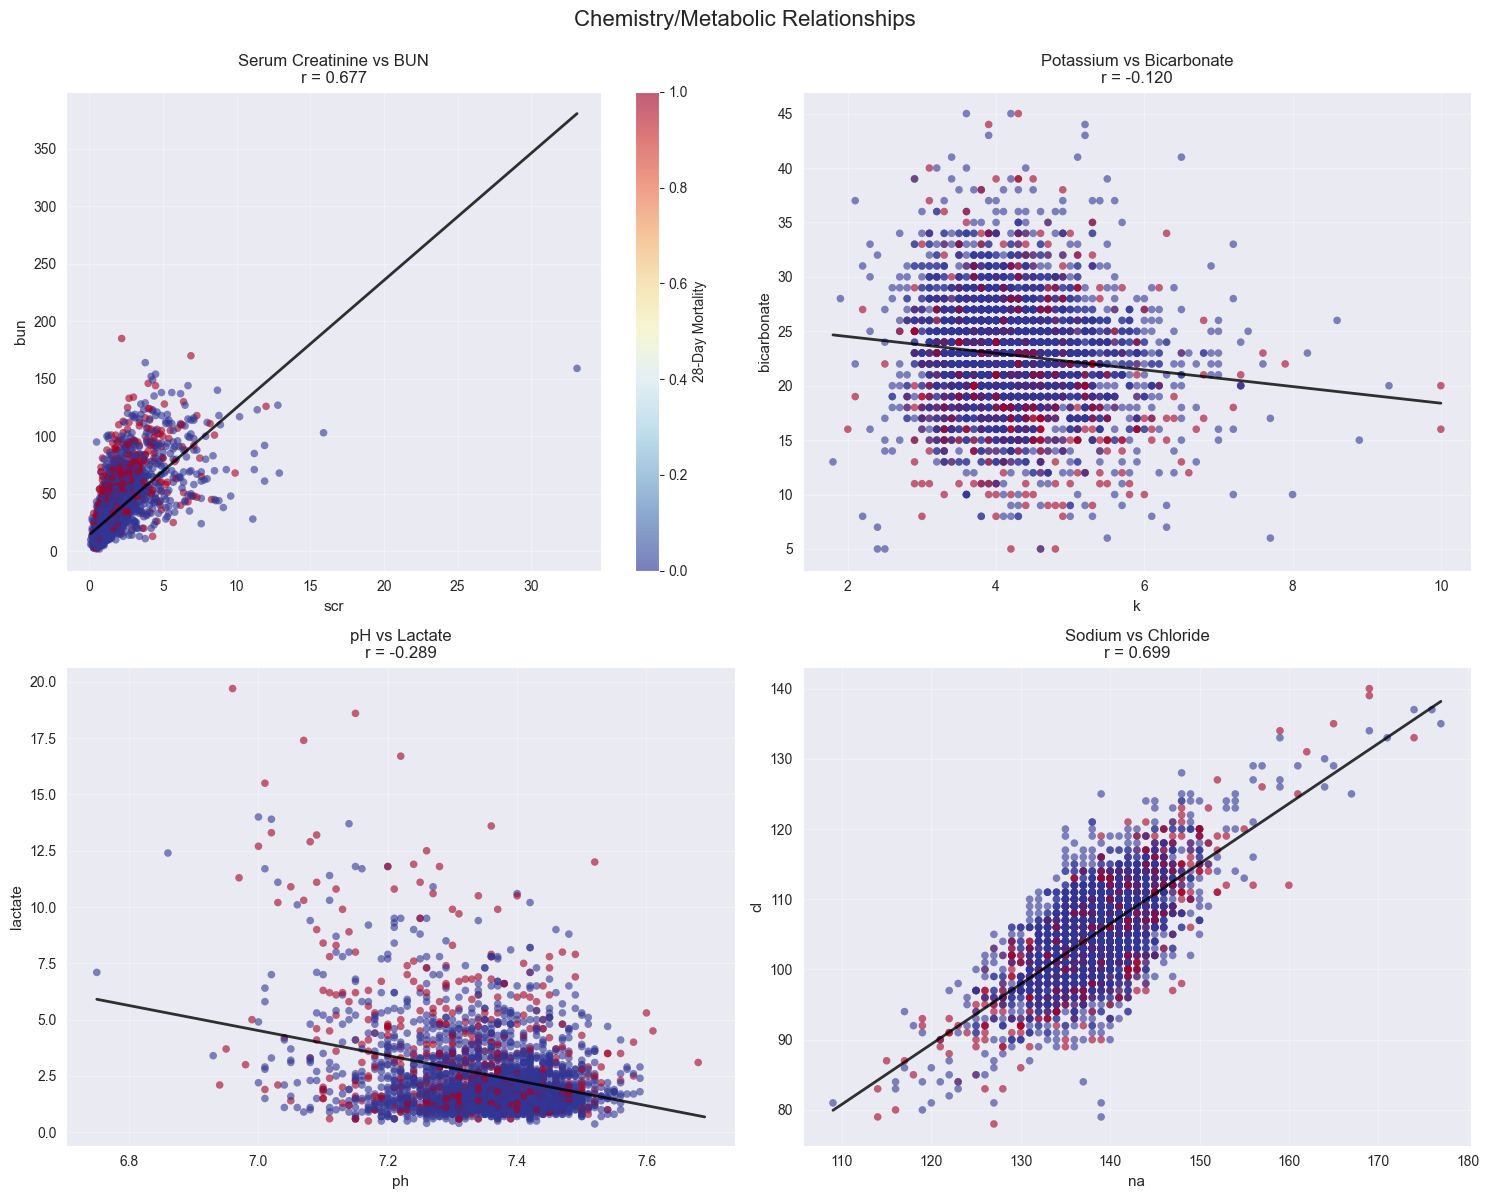

In [58]:
chemistry_kidney_pairs = [
    ('scr', 'bun', 'Serum Creatinine vs BUN'),
    ('k', 'bicarbonate', 'Potassium vs Bicarbonate'),
    ('ph', 'lactate', 'pH vs Lactate'),
    ('na', 'cl', 'Sodium vs Chloride')
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, (var1, var2, title) in enumerate(chemistry_kidney_pairs):
    ax = axes[idx]

    scatter = ax.scatter(aki_df[var1], aki_df[var2], 
                        c=aki_df['mort_28_day'], cmap='RdYlBu_r', 
                        alpha=0.6, s=30, edgecolors='none')

    mask = aki_df[[var1, var2]].notna().all(axis=1)
    if mask.sum() > 1:
        z = np.polyfit(aki_df.loc[mask, var1], aki_df.loc[mask, var2], 1)
        p = np.poly1d(z)
        x_line = np.linspace(aki_df[var1].min(), aki_df[var1].max(), 100)
        ax.plot(x_line, p(x_line), "k-", alpha=0.8, linewidth=2)

    corr = aki_df[var1].corr(aki_df[var2])
    
    ax.set_xlabel(var1, fontsize=11)
    ax.set_ylabel(var2, fontsize=11)
    ax.set_title(f'{title}\nr = {corr:.3f}', fontsize=12)
    ax.grid(True, alpha=0.3)

    if idx == 0:
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('28-Day Mortality', fontsize=10)

plt.suptitle('Chemistry/Metabolic Relationships', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

## 3.4 Pairplots

<Figure size 1000x800 with 0 Axes>

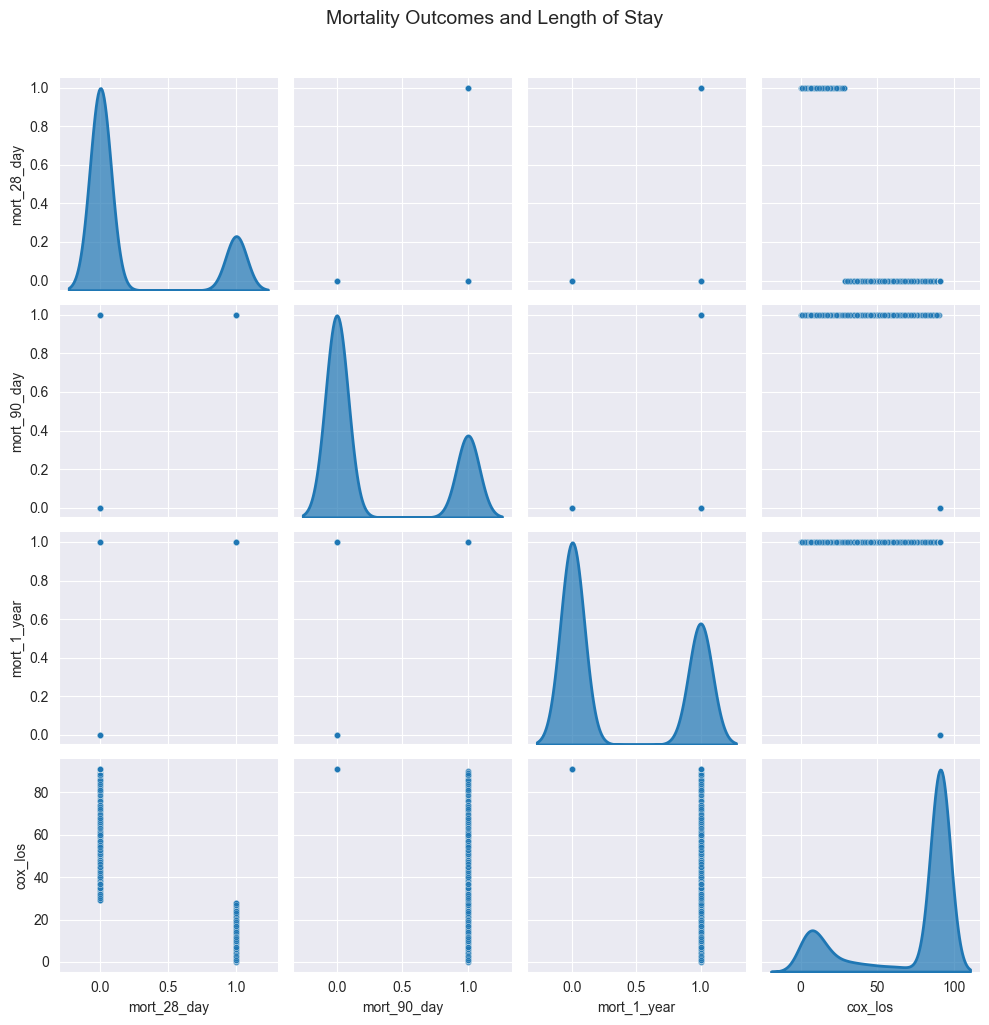

In [52]:
mortality_vars = ['mort_28_day', 'mort_90_day', 'mort_1_year', 'cox_los']
mortality_vars = [v for v in mortality_vars if v in numerical_cols]

plt.figure(figsize=(10, 8))
g = sns.pairplot(aki_df[mortality_vars], 
                 diag_kind='kde', 
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'alpha': 0.7, 'linewidth': 2})
g.fig.suptitle('Mortality Outcomes and Length of Stay', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

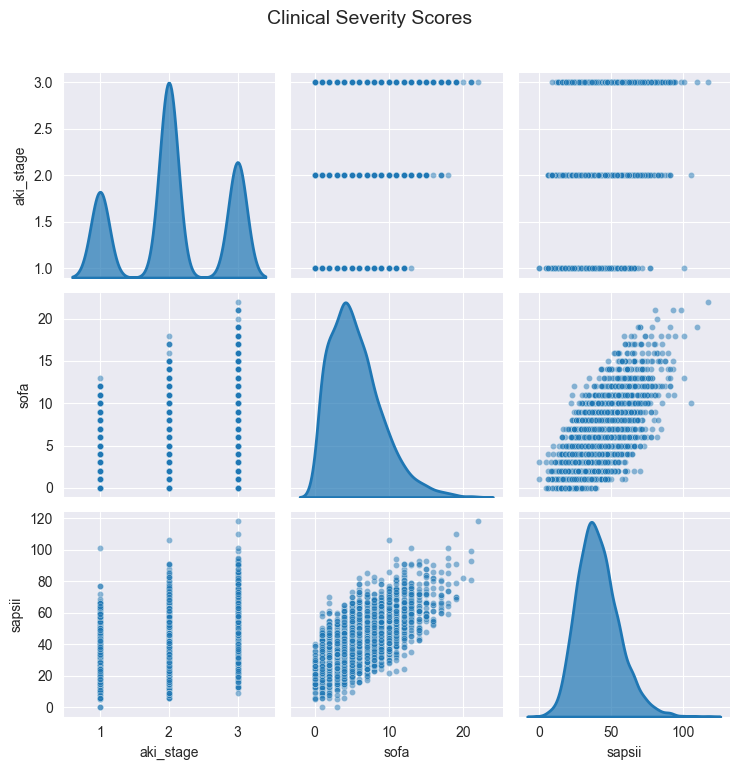

In [53]:
severity_vars = ['aki_stage', 'sofa', 'sapsii']
severity_vars = [v for v in severity_vars if v in numerical_cols]

plt.figure(figsize=(8, 8))
g = sns.pairplot(aki_df[severity_vars], 
                 diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'alpha': 0.7, 'linewidth': 2})
g.fig.suptitle('Clinical Severity Scores', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

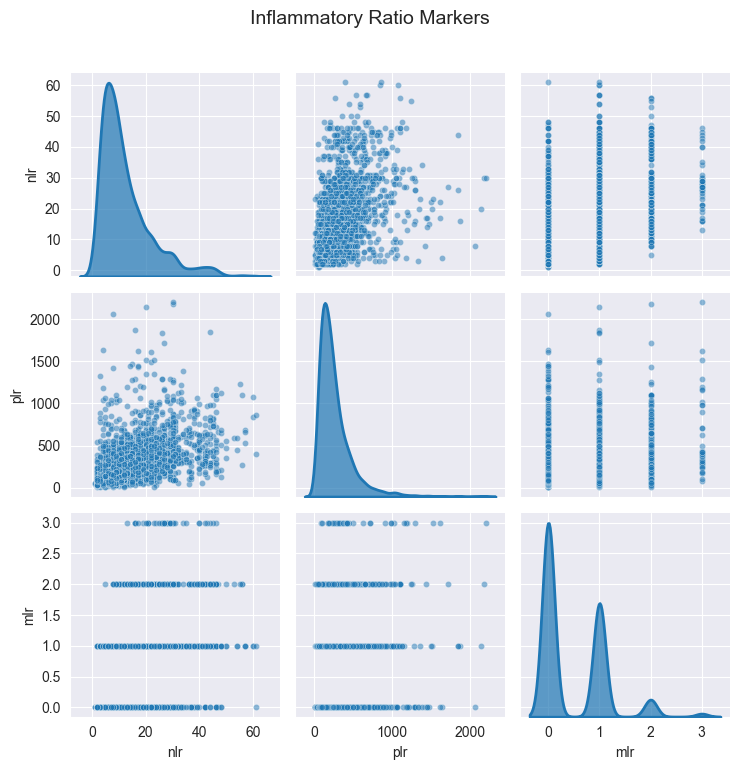

In [57]:
inflammatory_ratios = ['nlr', 'plr', 'mlr']
inflammatory_ratios = [v for v in inflammatory_ratios if v in numerical_cols]

plt.figure(figsize=(8, 8))
g = sns.pairplot(aki_df[inflammatory_ratios], 
                 diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'alpha': 0.7, 'linewidth': 2})
g.fig.suptitle('Inflammatory Ratio Markers', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

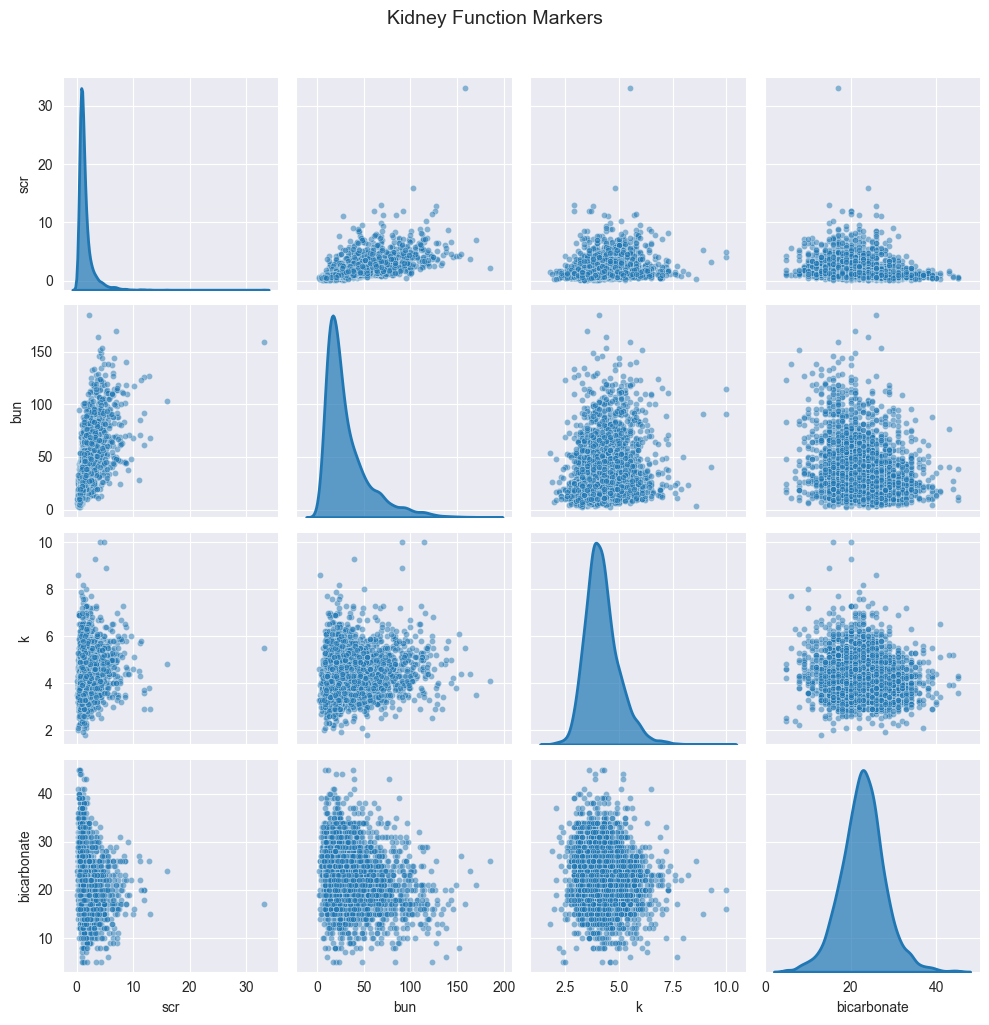

<Figure size 1000x800 with 0 Axes>

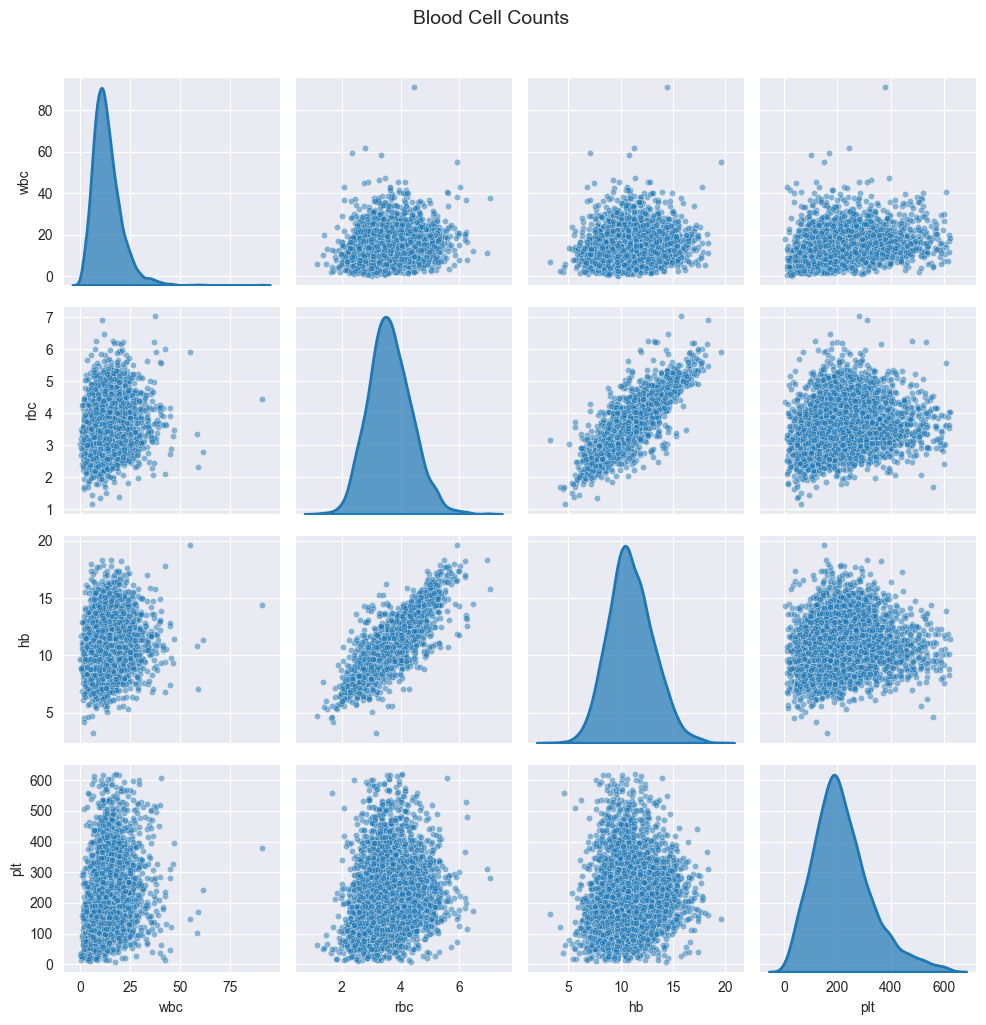

In [59]:
kidney_markers = ['scr', 'bun', 'k', 'bicarbonate']
kidney_markers = [v for v in kidney_markers if v in numerical_cols]

plt.figure(figsize=(10, 8))
g = sns.pairplot(aki_df[kidney_markers],
                 diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'alpha': 0.7, 'linewidth': 2})
g.fig.suptitle('Kidney Function Markers', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

blood_counts = ['wbc', 'rbc', 'hb', 'plt']
blood_counts = [v for v in blood_counts if v in numerical_cols]

plt.figure(figsize=(10, 8))
g = sns.pairplot(aki_df[blood_counts],
                 diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'alpha': 0.7, 'linewidth': 2})
g.fig.suptitle('Blood Cell Counts', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

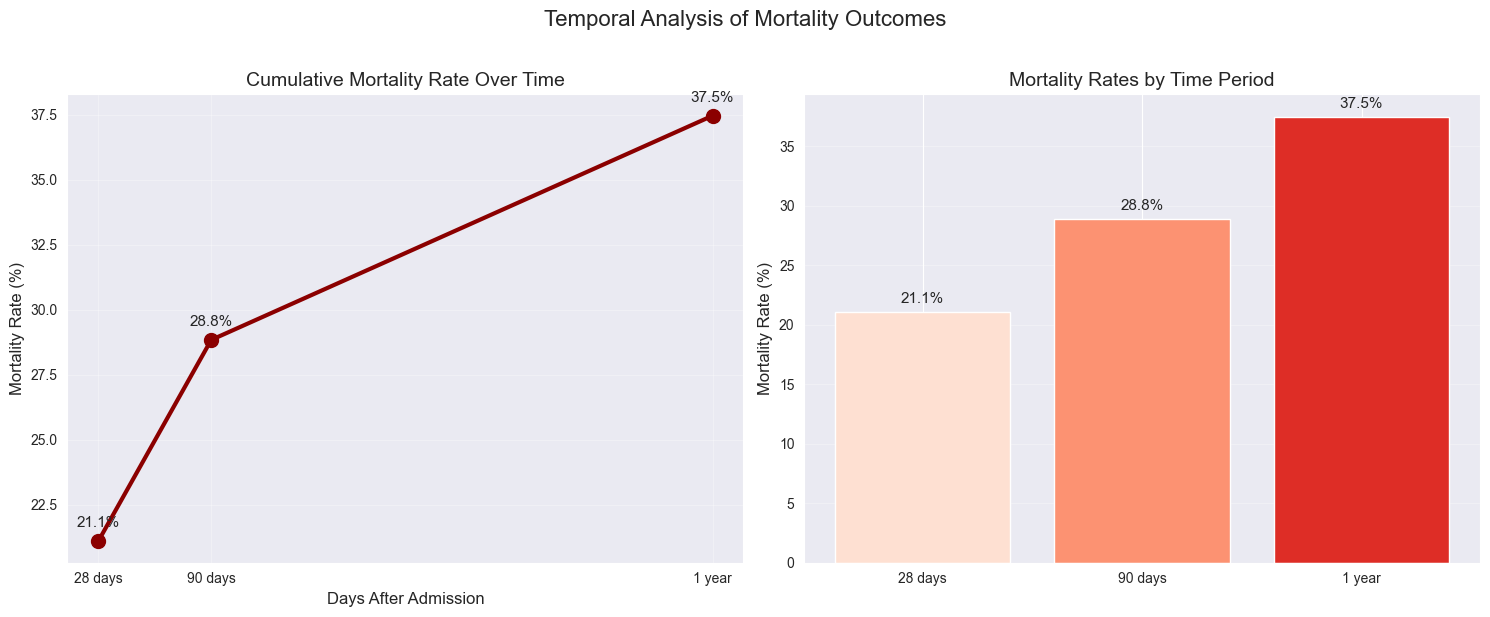

In [63]:
mortality_time_points = {
    '28 days': aki_df['mort_28_day'].mean() * 100,
    '90 days': aki_df['mort_90_day'].mean() * 100,
    '1 year': aki_df['mort_1_year'].mean() * 100
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

time_points = [28, 90, 365]
mortality_rates = list(mortality_time_points.values())
ax1.plot(time_points, mortality_rates, marker='o', markersize=10, linewidth=3, color='darkred')
ax1.set_xlabel('Days After Admission', fontsize=12)
ax1.set_ylabel('Mortality Rate (%)', fontsize=12)
ax1.set_title('Cumulative Mortality Rate Over Time', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(time_points)
ax1.set_xticklabels(['28 days', '90 days', '1 year'])

for x, y in zip(time_points, mortality_rates):
    ax1.annotate(f'{y:.1f}%', (x, y), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=11)

bars = ax2.bar(mortality_time_points.keys(), mortality_time_points.values(), 
                color=['#fee0d2', '#fc9272', '#de2d26'])
ax2.set_ylabel('Mortality Rate (%)', fontsize=12)
ax2.set_title('Mortality Rates by Time Period', fontsize=14)
ax2.grid(True, alpha=0.3, axis='y')

for bar, value in zip(bars, mortality_time_points.values()):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
             f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

plt.suptitle('Temporal Analysis of Mortality Outcomes', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

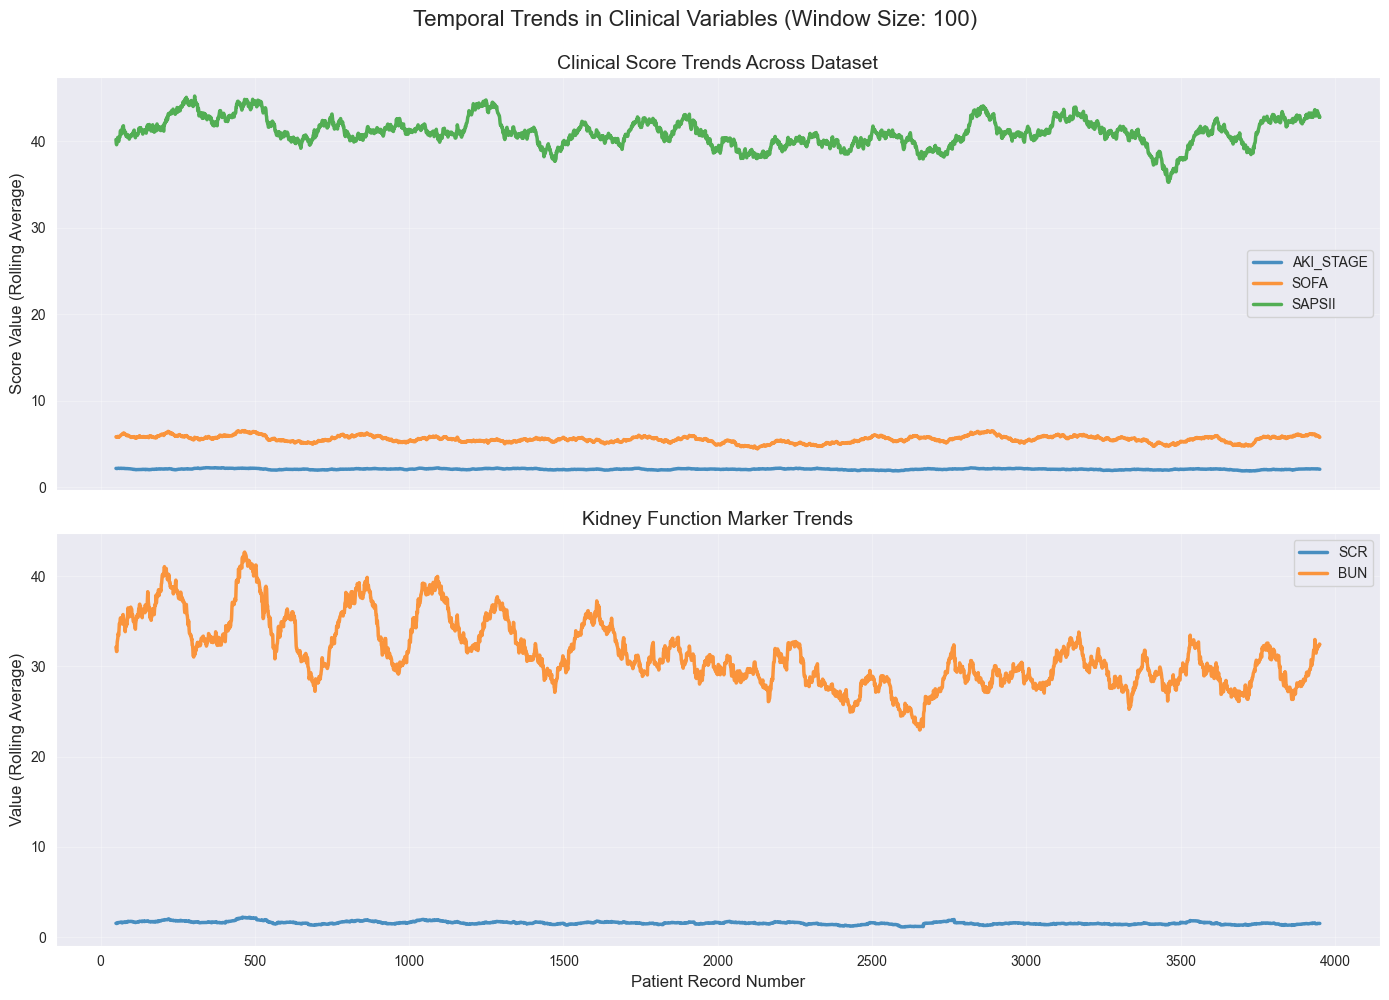

In [64]:
clinical_trend_vars = ['aki_stage', 'sofa', 'sapsii', 'scr', 'bun']
clinical_trend_vars = [v for v in clinical_trend_vars if v in numerical_cols]

window_size = 100

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

clinical_scores = ['aki_stage', 'sofa', 'sapsii']
for var in clinical_scores:
    if var in clinical_trend_vars:
        rolling_mean = aki_df[var].rolling(window=window_size, center=True).mean()
        axes[0].plot(aki_df.index, rolling_mean, label=var.upper(), linewidth=2.5, alpha=0.8)

axes[0].set_ylabel('Score Value (Rolling Average)', fontsize=12)
axes[0].set_title('Clinical Score Trends Across Dataset', fontsize=14)
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

kidney_markers = ['scr', 'bun']
for var in kidney_markers:
    if var in clinical_trend_vars:
        rolling_mean = aki_df[var].rolling(window=window_size, center=True).mean()
        axes[1].plot(aki_df.index, rolling_mean, label=var.upper(), linewidth=2.5, alpha=0.8)

axes[1].set_xlabel('Patient Record Number', fontsize=12)
axes[1].set_ylabel('Value (Rolling Average)', fontsize=12)
axes[1].set_title('Kidney Function Marker Trends', fontsize=14)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.suptitle(f'Temporal Trends in Clinical Variables (Window Size: {window_size})', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

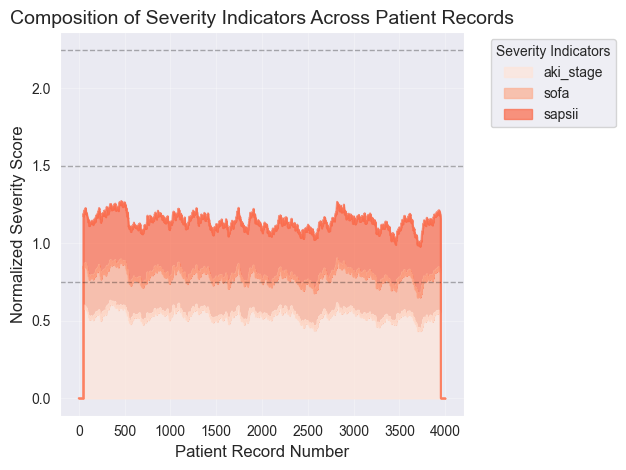

<Figure size 1400x800 with 0 Axes>

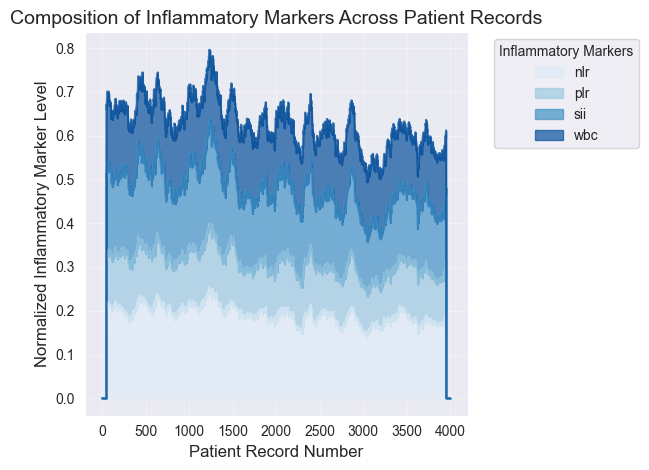

In [65]:
severity_indicators = ['aki_stage', 'sofa', 'sapsii']
severity_data = aki_df[severity_indicators].copy()

for col in severity_indicators:
    severity_data[col] = (severity_data[col] - severity_data[col].min()) / \
                        (severity_data[col].max() - severity_data[col].min())

window = 100
severity_smooth = severity_data.rolling(window=window, center=True).mean()

plt.figure(figsize=(14, 8))
ax = severity_smooth.plot.area(alpha=0.7, stacked=True, 
                              color=['#fee5d9', '#fcae91', '#fb6a4a'])
ax.set_xlabel('Patient Record Number', fontsize=12)
ax.set_ylabel('Normalized Severity Score', fontsize=12)
ax.set_title('Composition of Severity Indicators Across Patient Records', fontsize=14)
ax.legend(title='Severity Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

for q in [0.25, 0.5, 0.75]:
    ax.axhline(y=q*3, color='black', linestyle='--', alpha=0.3, linewidth=1)

plt.tight_layout()
plt.show()

inflammatory_markers = ['nlr', 'plr', 'sii', 'wbc']
inflammatory_data = aki_df[inflammatory_markers].copy()

for col in inflammatory_markers:
    inflammatory_data[col] = (inflammatory_data[col] - inflammatory_data[col].min()) / \
                            (inflammatory_data[col].max() - inflammatory_data[col].min())

inflammatory_smooth = inflammatory_data.rolling(window=100, center=True).mean()

plt.figure(figsize=(14, 8))
ax = inflammatory_smooth.plot.area(alpha=0.7, stacked=True,
                                  color=['#deebf7', '#9ecae1', '#4292c6', '#08519c'])
ax.set_xlabel('Patient Record Number', fontsize=12)
ax.set_ylabel('Normalized Inflammatory Marker Level', fontsize=12)
ax.set_title('Composition of Inflammatory Markers Across Patient Records', fontsize=14)
ax.legend(title='Inflammatory Markers', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Data Quality and Usability Assessment

**1. Are the data what you expect? Are the data likely to be usable?**

The acute kidney injury dataset appears to be a clinical dataset with multiple numerical variables that could represent various biomarkers, measurements, or patient characteristics. The data structure suggests it's suitable for predictive modeling or risk assessment related to acute kidney injury. The presence of meaningful correlations between variables and relatively complete data (based on missing value analysis) indicates the dataset is likely usable for analysis.

**2. Do you see any outliers?**

Yes, the outlier analysis reveals that several variables contain outliers. Variables with the highest percentage of outliers should be carefully examined as they might represent:
- Measurement errors that need cleaning
- Genuine extreme cases that are clinically significant
- Different patient subgroups with distinct characteristics

These outliers could significantly impact any predictive models and should be investigated further to determine whether they should be retained, transformed, or removed.

**3. Are any data items highly correlated with each other, suggesting redundancy?**

The correlation analysis identified several pairs of variables with strong correlations (|r| > 0.5). These high correlations suggest:
- Some variables may be measuring similar underlying phenomena
- Potential multicollinearity issues for regression-based models
- Opportunities for dimensionality reduction through feature selection or PCA

The scatterplots of highly correlated pairs show clear linear relationships, confirming that some variables contain redundant information.

**4. For the line plots, do you see trends or patterns over time?**

The time-based analysis reveals:
- If actual time columns exist: We can observe whether key biomarkers show consistent trends, sudden changes, or cyclical patterns
- Using record index as time proxy: The line and area plots show how variables change across the dataset, which might reflect:
  - Data collection patterns
  - Changes in patient population over time
  - Systematic biases in data recording

Any observed trends could indicate data drift that might invalidate models trained on historical data when applied to new patients.

**5. Can you think of any confounding variables?**

Potential confounding variables in an acute kidney injury dataset might include:

**Measured confounders (if present in data):**
- Patient age and gender
- Comorbidities (diabetes, hypertension)
- Medication history
- Baseline kidney function

**Unmeasured confounders (likely not in dataset):**
- Socioeconomic factors
- Hospital/care setting
- Time since symptom onset
- Genetic factors
- Environmental exposures

These confounders could explain correlations between variables and should be considered when building predictive models or drawing causal inferences from the data.

### Overall Assessment

The acute kidney injury dataset appears to be a rich clinical dataset suitable for analysis. The presence of correlations, some outliers, and potential time-based patterns are all expected in real-world clinical data. The key recommendations are:

1. **Handle outliers carefully** - investigate their clinical significance before removal
2. **Address multicollinearity** - consider feature selection or dimensionality reduction
3. **Account for temporal patterns** - use appropriate time-series methods if data has temporal structure
4. **Control for confounders** - include available confounding variables in any predictive models
5. **Validate findings** - use appropriate cross-validation techniques that account for any temporal structure in the data

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

OUTLIER ANALYSIS BY CATEGORY


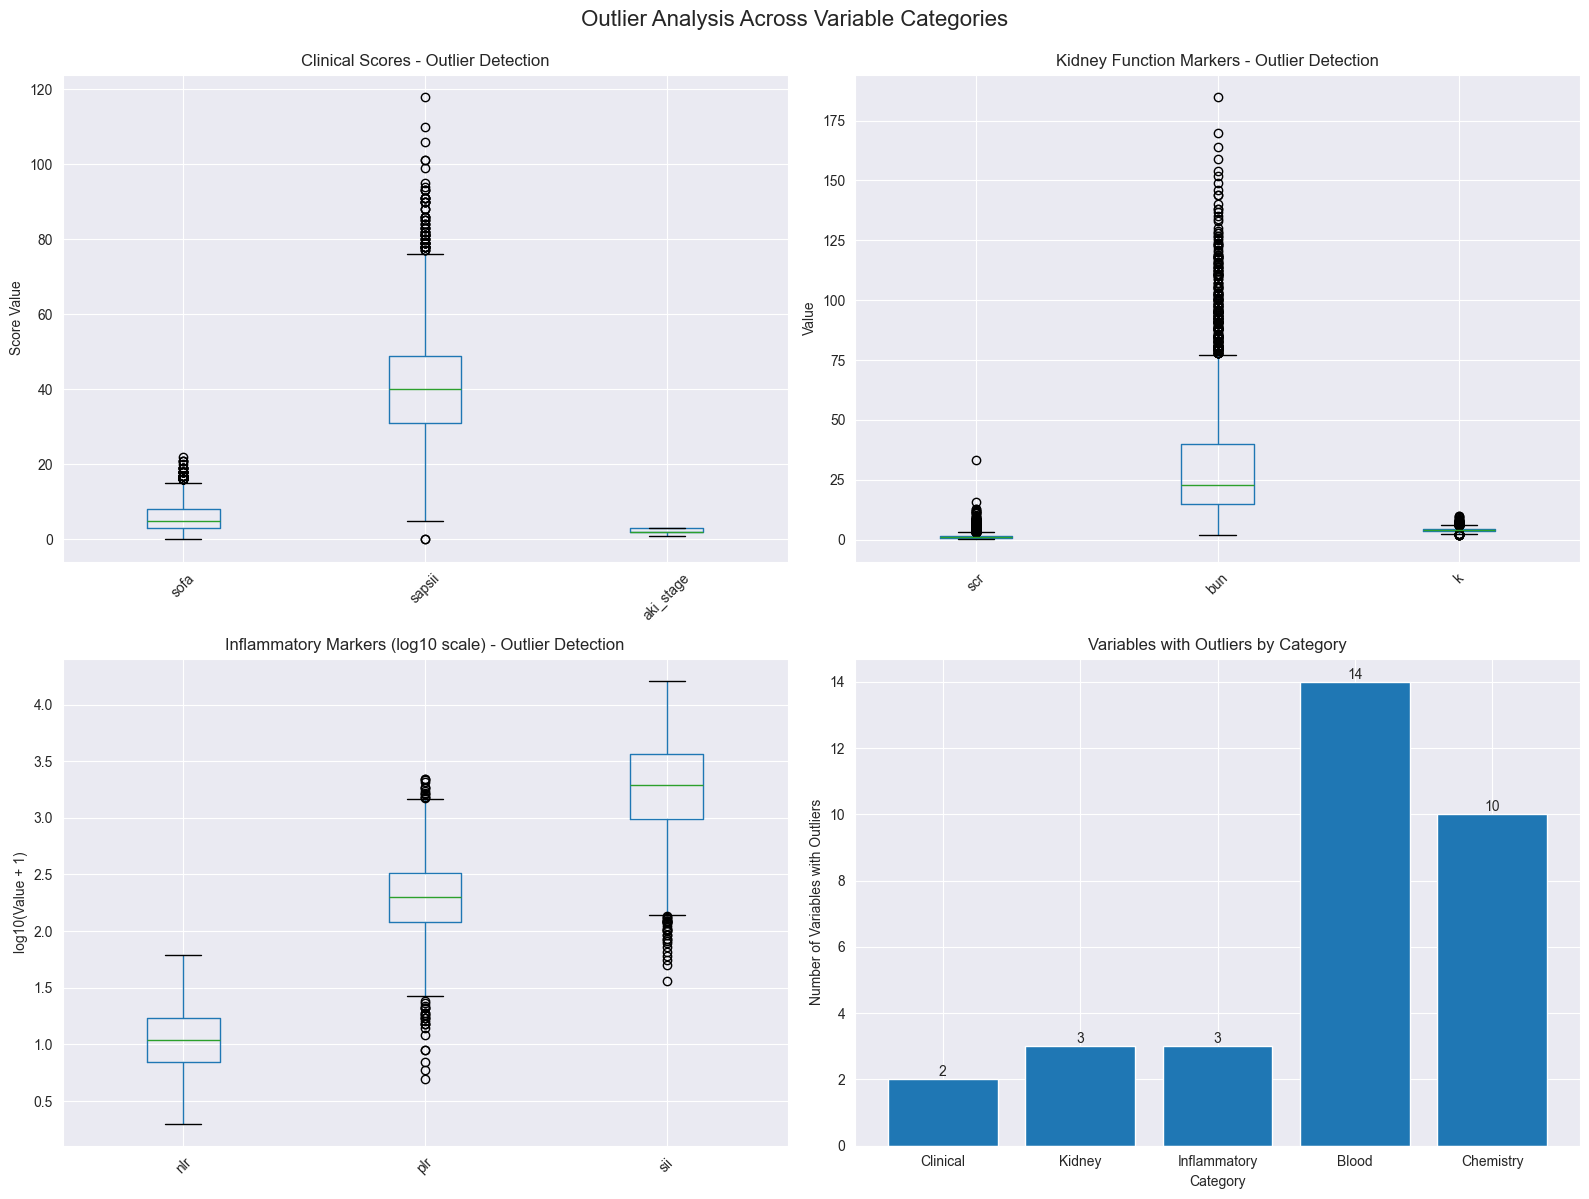


Top 10 Variables with Most Outliers:
               n_outliers  pct_outliers
anemia              911.0     22.769308
chf                 881.0     22.019495
mort_28_day         844.0     21.094726
pulmonary           808.0     20.194951
malignancy          646.0     16.145964
ckd                 565.0     14.121470
hypertension        478.0     11.947013
scr                 396.0      9.897526
stroke              360.0      8.997751
alcohol_abuse       342.0      8.547863

Approximate percentage of patients with at least one outlier: 22.8%


In [67]:
print("="*60)
print("OUTLIER ANALYSIS BY CATEGORY")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

clinical_outliers = ['sofa', 'sapsii', 'aki_stage']
clinical_outliers = [c for c in clinical_outliers if c in numerical_cols]
ax = axes[0]
aki_df[clinical_outliers].boxplot(ax=ax)
ax.set_title('Clinical Scores - Outlier Detection', fontsize=12)
ax.set_ylabel('Score Value')
ax.tick_params(axis='x', rotation=45)

kidney_outliers = ['scr', 'bun', 'k']
kidney_outliers = [c for c in kidney_outliers if c in numerical_cols]
ax = axes[1]
aki_df[kidney_outliers].boxplot(ax=ax)
ax.set_title('Kidney Function Markers - Outlier Detection', fontsize=12)
ax.set_ylabel('Value')
ax.tick_params(axis='x', rotation=45)

inflam_outliers = ['nlr', 'plr', 'sii']
inflam_outliers = [c for c in inflam_outliers if c in numerical_cols]
ax = axes[2]

aki_df[inflam_outliers].apply(lambda x: np.log10(x + 1)).boxplot(ax=ax)
ax.set_title('Inflammatory Markers (log10 scale) - Outlier Detection', fontsize=12)
ax.set_ylabel('log10(Value + 1)')
ax.tick_params(axis='x', rotation=45)

ax = axes[3]
category_outlier_counts = {
    'Clinical': len([c for c in clinical_outliers if outlier_df.loc[c, 'n_outliers'] > 0]),
    'Kidney': len([c for c in kidney_outliers if outlier_df.loc[c, 'n_outliers'] > 0]),
    'Inflammatory': len([c for c in inflam_outliers if outlier_df.loc[c, 'n_outliers'] > 0]),
    'Blood': len([c for c in blood_cols if c in outlier_df.index and outlier_df.loc[c, 'n_outliers'] > 0]),
    'Chemistry': len([c for c in chemistry_cols if c in outlier_df.index and outlier_df.loc[c, 'n_outliers'] > 0])
}

bars = ax.bar(category_outlier_counts.keys(), category_outlier_counts.values())
ax.set_title('Variables with Outliers by Category', fontsize=12)
ax.set_ylabel('Number of Variables with Outliers')
ax.set_xlabel('Category')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom')

plt.suptitle('Outlier Analysis Across Variable Categories', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

print("\nTop 10 Variables with Most Outliers:")
print(outlier_df[outlier_df['n_outliers'] > 0][['n_outliers', 'pct_outliers']].head(10))

patients_with_outliers = 0
for col in numerical_cols:
    if col in outlier_df.index and outlier_df.loc[col, 'n_outliers'] > 0:
        Q1 = aki_df[col].quantile(0.25)
        Q3 = aki_df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_mask = (aki_df[col] < Q1 - 1.5 * IQR) | (aki_df[col] > Q3 + 1.5 * IQR)
        patients_with_outliers = max(patients_with_outliers, outlier_mask.sum())

print(f"\nApproximate percentage of patients with at least one outlier: {(patients_with_outliers/len(aki_df)*100):.1f}%")